### Import labraries and load dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
weather_df = pd.read_csv("seattle-weather.csv")
weather_df 

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [3]:
weather_df .shape

(1461, 6)

In [4]:
weather_df .isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [5]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [6]:
# working on date column
import datetime as dt
weather_df['date']  =pd.to_datetime(weather_df['date'])

In [7]:
weather_df['date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1461 entries, 0 to 1460
Series name: date
Non-Null Count  Dtype         
--------------  -----         
1461 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 11.5 KB


In [8]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [9]:
weather_df[weather_df['temp_max']==max(weather_df.temp_max)]

,date,precipitation,temp_max,temp_min,wind,weather
953,2014-08-11,0.5,35.6,17.8,2.6,rain


In [10]:
weather_df[weather_df['temp_min']==min(weather_df.temp_min)]

,date,precipitation,temp_max,temp_min,wind,weather
706,2013-12-07,0.0,0.0,-7.1,3.1,sun


<Axes: xlabel='temp_min', ylabel='Count'>

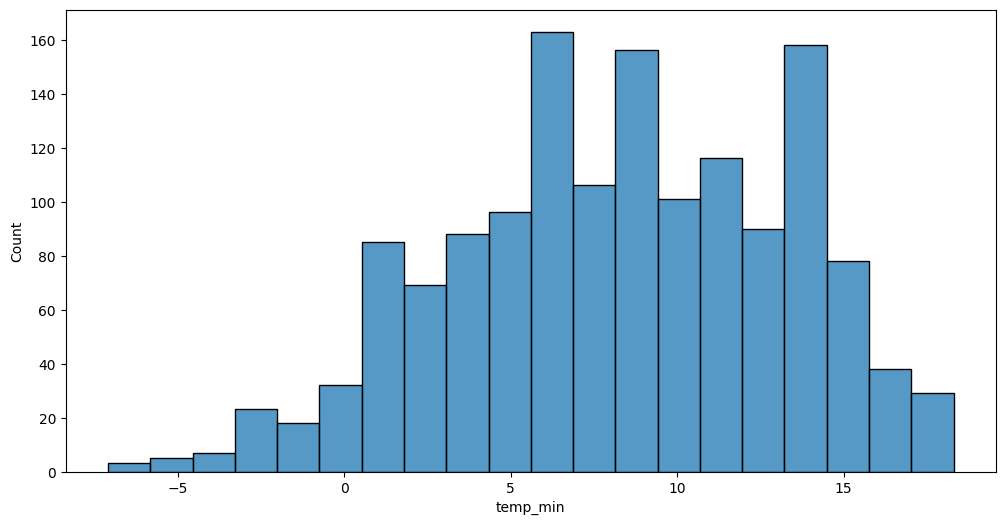

In [11]:
plt.figure(figsize=(12,6))
sns.histplot(data=weather_df,x =weather_df.temp_min,bins=20)

<Axes: xlabel='temp_max', ylabel='Count'>

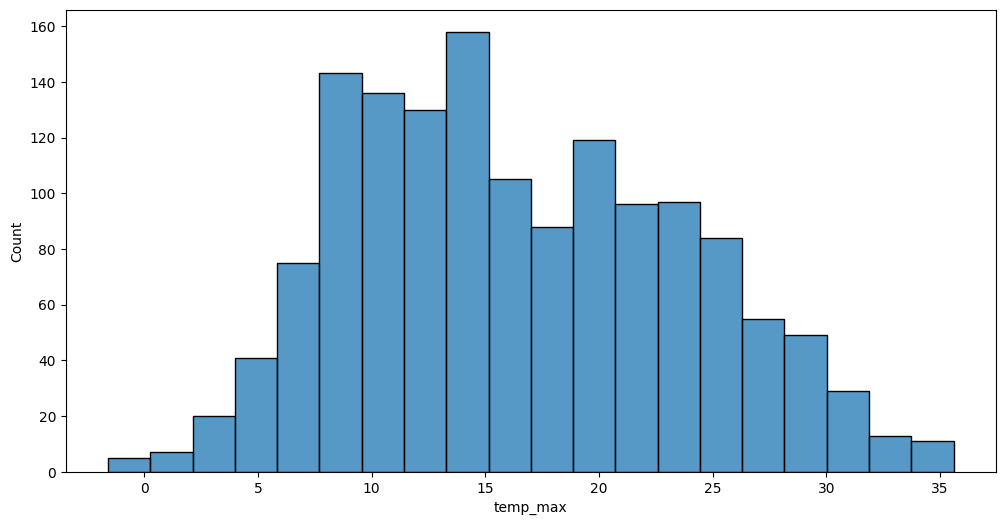

In [12]:
plt.figure(figsize=(12,6))
sns.histplot(data=weather_df,x =weather_df.temp_max,bins=20)

In [13]:
weather_df.weather.value_counts()

weather
rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: count, dtype: int64

<Axes: xlabel='weather', ylabel='count'>

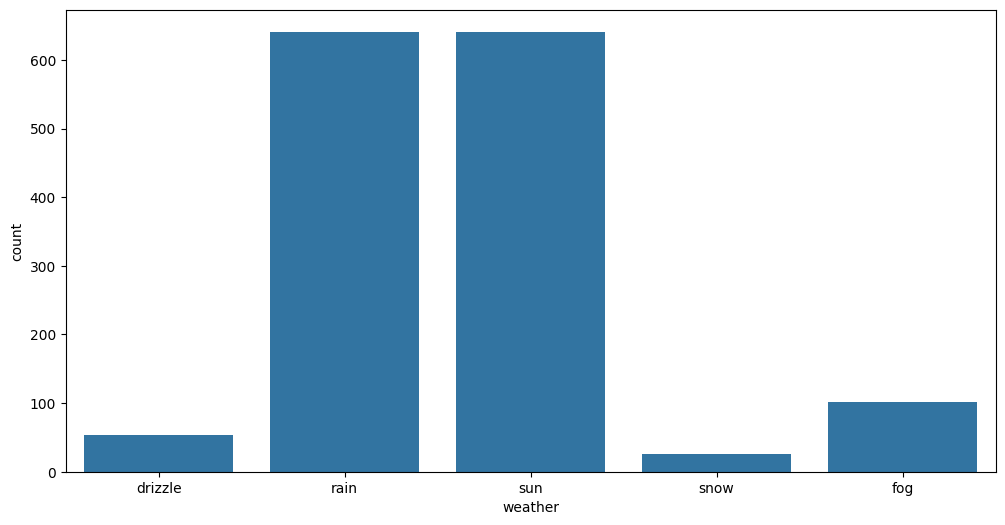

In [14]:
plt.figure(figsize=(12,6))
sns.countplot(data=weather_df,x=weather_df.weather)

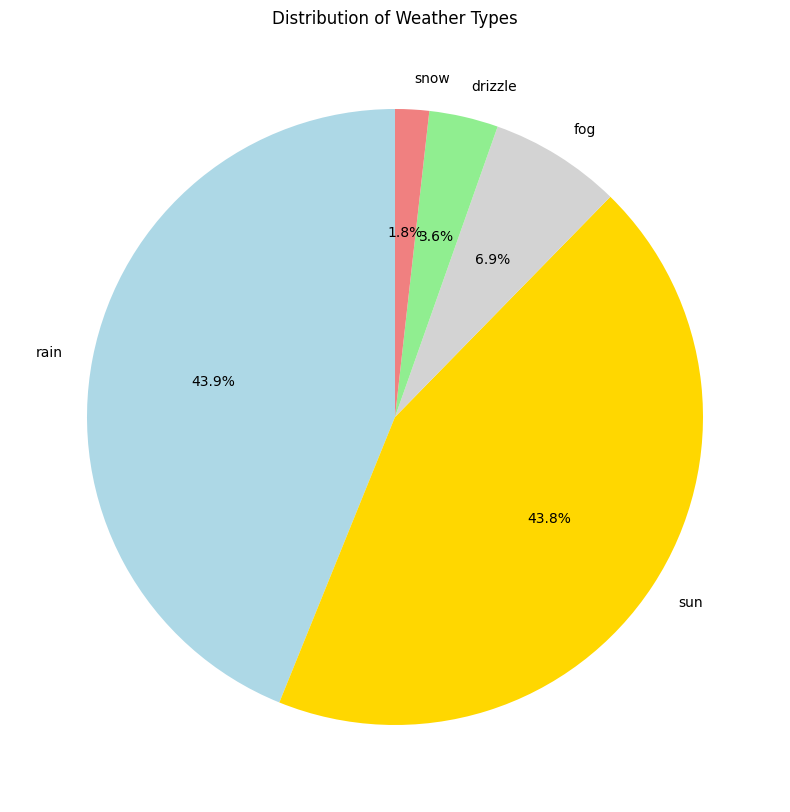

In [15]:
x=weather_df.weather.value_counts()
plt.figure(figsize=(12, 10))
plt.pie(x, labels=x.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'gold', 'lightgray', 'lightgreen', 'lightcoral'])
plt.title('Distribution of Weather Types')
plt.show()

In [16]:
weather_df['weather'].unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

In [17]:
# working on weather column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

weather_df["weather"] = le.fit_transform(weather_df['weather'])

In [18]:
weather_df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,0
1,2012-01-02,10.9,10.6,2.8,4.5,2
2,2012-01-03,0.8,11.7,7.2,2.3,2
3,2012-01-04,20.3,12.2,5.6,4.7,2
4,2012-01-05,1.3,8.9,2.8,6.1,2
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,2
1457,2015-12-28,1.5,5.0,1.7,1.3,2
1458,2015-12-29,0.0,7.2,0.6,2.6,1
1459,2015-12-30,0.0,5.6,-1.0,3.4,4


### Feature extraction and  then Applying machine learning model

In [20]:
X = weather_df[['precipitation','temp_max','temp_min','wind']]
y = weather_df['weather']

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=101)

In [22]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()


In [23]:
nb_model.fit(X_train,y_train)

GaussianNB()

In [24]:
pred_train = nb_model.predict(X_train)
pred_test = nb_model.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [29]:
accuracy_score(y_test,pred_test)*100

84.98293515358361

In [31]:
accuracy_score(y_train,pred_train)*100

84.8458904109589

In [33]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.00      0.00      0.00        20
           2       0.98      0.92      0.95       124
           3       0.80      0.67      0.73         6
           4       0.77      0.99      0.86       132

    accuracy                           0.85       293
   macro avg       0.51      0.52      0.51       293
weighted avg       0.78      0.85      0.81       293



C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

<Axes: >

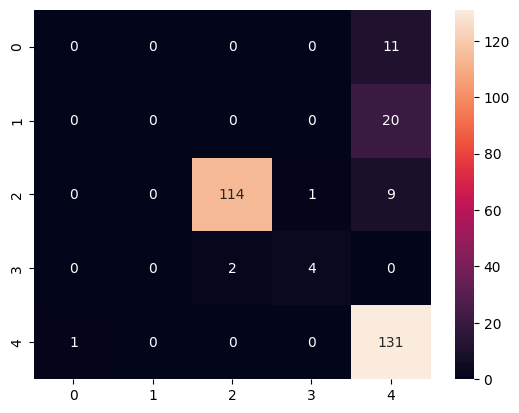

In [34]:
cm = confusion_matrix(y_test,pred_test)
sns.heatmap(cm,annot=True,fmt='d')